#Building a Multi-Variate Linear Regression Model using King County,House Prices Dataset

## Business Understanding

The King County House Sales dataset contains comprehensive information about house sales, including features such as the number of bedrooms, number of bathrooms, square footage of living space in the home, number of floors in the house, how good the overall condition of the house is, overall house grade which is related to design and construction, and year when the house was built. To better understand the dataset, we will perform exploratory data analysis, examine distributions, identify correlations, and assess feature importance.

## Problem statement

The current challenge faced by HomeLink Realty is the lack of a comprehensive system to provide homeowners with accurate and informed advice regarding home renovations and their potential impact on the estimated value of their properties. Without clear guidance on the expected increase in value resulting from renovations, homeowners may struggle to make informed decisions about investing in home improvements, hindering their ability to maximize the value of their properties and potentially impacting their overall real estate goals.

## Main Objective

The purpose of this project is to come up with ways in which to maximize profitability for sellers attempting to sell a home in King County. We will search for actionable insights that will serve guidance to these sellers, but we need a thorough understanding of the dynamics of the housing market in order to drive our calculated decisions.


## Experimental Design

* Data Collection
* Read and check data
* Cleaning the data
* Exploratory Data Anaylsis
* Modelling
* Conclusions and Recommendations

## Data Understanding

The data utilized in this project is `kc_house_data.csv` file as it provides relevant information for the analysis process


| Column Name  | Description                                         |
|--------------|-----------------------------------------------------|
| id           | Unique identifier for a house                        |
| date         | Date house was sold                                 |
| price        | Sale price (prediction target)                       |
| bedrooms     | Number of bedrooms                                  |
| bathrooms    | Number of bathrooms                                 |
| sqft_living  | Square footage of living space in the home           |
| sqft_lot     | Square footage of the lot                            |
| floors       | Number of floors (levels) in house                   |
| waterfront   | Whether the house is on a waterfront                 |


These columns provide essential information about the houses in the dataset, which can be used for various analyses, such as predicting house prices, understanding the relationship between different features, or exploring the housing market trends.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Data

In [2]:
house_df = pd.read_csv('data/kc_house_data.csv')
to_drop = ['date', 'view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','id']
house_copy = house_df.copy()
house_copy.drop(to_drop, axis=1, inplace=True)
house_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


## Data Wrangling

### Checking for missing values in the data

In [3]:
house_copy.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

### Checking to the data type of waterfront and checkiing if it is categorical

In [4]:
house_copy['waterfront'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: waterfront
Non-Null Count  Dtype 
--------------  ----- 
19221 non-null  object
dtypes: object(1)
memory usage: 168.9+ KB


In [5]:
house_copy['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

### Dropping the missing values in waterfront because the column is categorical

In [6]:
house_copy.dropna(subset=['waterfront'], axis=0, inplace=True)
house_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009


Checking if all missing values have been removed

In [7]:
house_copy.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

### Creating dummies for one hot encoding 

In [8]:
dummy_list = ['waterfront', 'condition', 'grade']
dummies = pd.get_dummies(house_copy[dummy_list], drop_first=True).astype(int)
house_copy = pd.concat([house_copy, dummies], axis=1)
house_copy.drop(dummy_list, axis=1, inplace=True)
house_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,538000.0,3,2.25,2570,7242,2.0,1951,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,1933,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,1987,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1230000.0,4,4.50,5420,101930,1.0,2001,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,2008,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21592,360000.0,3,2.50,1530,1131,3.0,2009,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2.0,2014,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0.75,1020,1350,2.0,2009,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Modelling the current data

In [9]:
y = house_copy['price']
X = house_copy.drop('price', axis=1)

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:54:40   Log-Likelihood:            -2.6296e+05
No. Observations:               19221   AIC:                         5.260e+05
Df Residuals:                   19199   BIC:                         5.261e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.391e+06   1

In [10]:
print(f"p-value of F-statistic: {model.f_pvalue}")

p-value of F-statistic: 0.0


In [11]:
model.f_pvalue < 0.05

True

As seen by the p-value of the F-statistic, the model is of statistical signifance as the value is below the signficance level &alpha; of 0.05. The model has an adjusted R-squared of 0.67 which means the model explains 67% of variance of the price. But ther are issues with the model as it suffers from the following:

* The p-value of the Jarque-Bera test is below the significance level (&alpha; = 0.05), indicating strong evidence to reject the null hypothesis. The null hypothesis assumes that the residuals of the model are normally distributed. Since the p-value is less than &alpha;, we can conclude that the residuals are not normally distributed. This implies that the model may not accurately capture the true coefficients and the goodness of fit of the regression model may be compromised.
* The model exhibits multicollinearity, indicated by the large value of the condition number. Multicollinearity occurs when the independent variables in a regression model are highly correlated with each other. This correlation hinders the model's ability to accurately estimate the effects of individual variables, as changing one variable may not have the expected impact due to its high correlation with other variables.

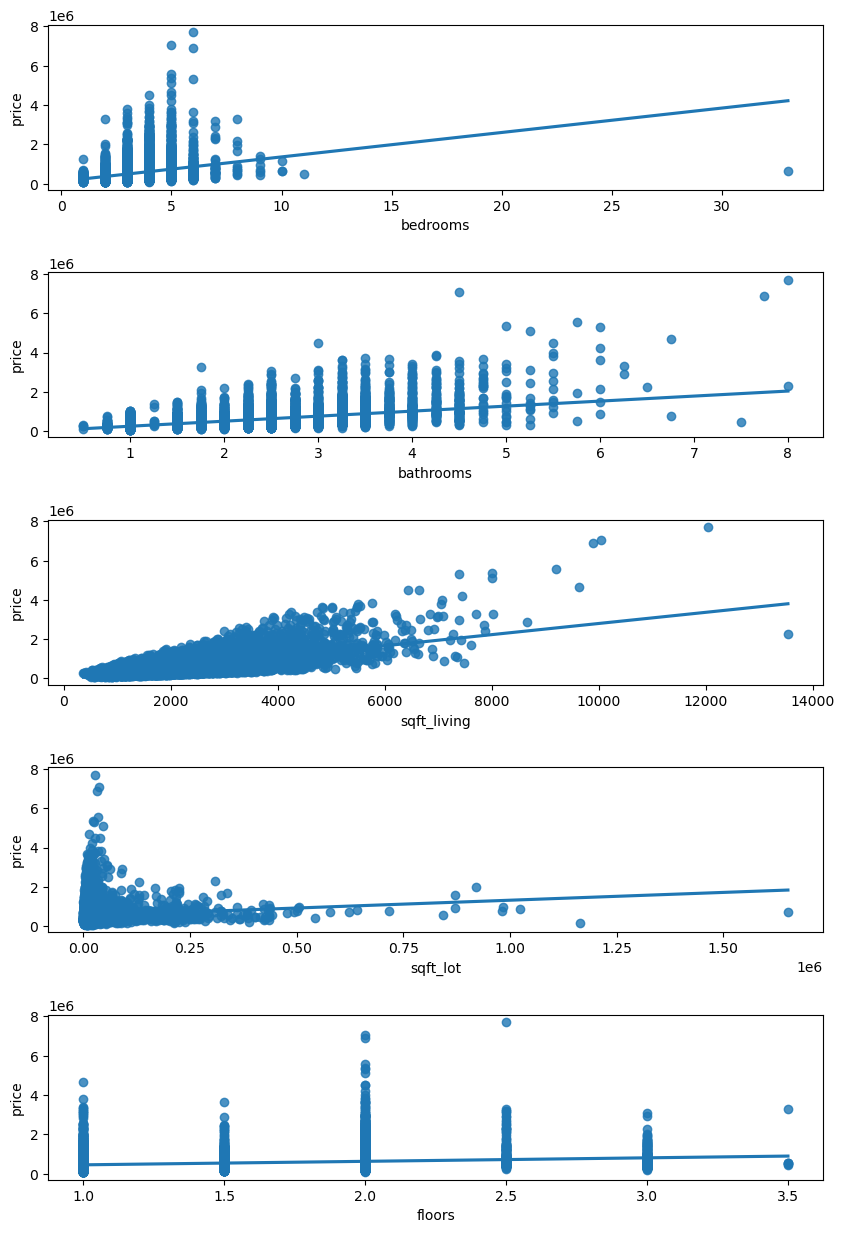

In [12]:
fig, ax = plt.subplots(nrows=5, figsize=(10,15))
sns.regplot(x=house_copy['bedrooms'], y=y, ci=None, ax=ax[0])
sns.regplot(x=house_copy['bathrooms'], y=y, ci=None, ax=ax[1])
sns.regplot(x=house_copy['sqft_living'], y=y, ci=None, ax=ax[2])
sns.regplot(x=house_copy['sqft_lot'], y=y, ci=None, ax=ax[3])
sns.regplot(x=house_copy['floors'], y=y, ci=None, ax=ax[4])

plt.subplots_adjust(hspace=0.5);  # Adjust the spacing between subplots;

As seen from the above graphs it is evident that the columns "bathrooms," "bedrooms," "sqft_living," and "sqft_lot" contain outliers that significantly deviate from the majority of the data points. These outliers have a detrimental impact on the model as they distort the interpretation of the coefficients.

The presence of extreme outliers in these variables can lead to misleading conclusions about their effects on the target variable. Outliers tend to have an undue influence on the regression analysis, affecting the estimation of coefficients and distorting the overall model fit.

### Transforming "sqft_lot" column using log transforming

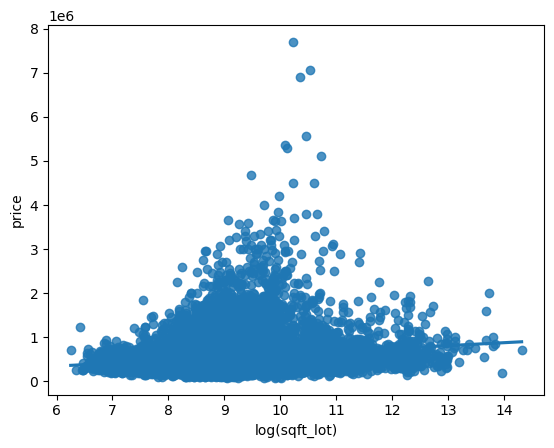

In [13]:
house_copy['log(sqft_lot)'] = np.log(house_copy['sqft_lot'])
sns.regplot(x=house_copy['log(sqft_lot)'], y=y, ci=None);

log transforming the "sqft_lot" column is that it can help linearize relationships that are naturally nonlinear. This transformation can make it more feasible to model the relationship between the variable and the response variable using linear regression or other linear models. By applying the log transformation, the relationship between "sqft_lot" and the response variable may become more linear and easier to capture using linear techniques.

### Dropping the sqft_lot column to prevent multicollinearity with log(sqft_lot) column

In [14]:
house_copy1 = house_copy.copy()
house_copy1.drop('sqft_lot', axis=1, inplace=True)
house_copy1

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
1,538000.0,3,2.25,2570,2.0,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.887653
2,180000.0,2,1.00,770,1.0,1933,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.210340
3,604000.0,4,3.00,1960,1.0,1965,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.517193
4,510000.0,3,2.00,1680,1.0,1987,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.997147
5,1230000.0,4,4.50,5420,1.0,2001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.532042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,2008,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7.165493
21592,360000.0,3,2.50,1530,3.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7.030857
21593,400000.0,4,2.50,2310,2.0,2014,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.667852
21594,402101.0,2,0.75,1020,2.0,2009,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7.207860


In [15]:
y1 = house_copy1['price']
new_X = house_copy1.drop('price', axis=1) 

new_model = sm.OLS(y1, sm.add_constant(new_X)).fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:54:52   Log-Likelihood:            -2.6278e+05
No. Observations:               19221   AIC:                         5.256e+05
Df Residuals:                   19199   BIC:                         5.258e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.502e+06   1

The model has an adjusted R-squared of 0.68 which is an increase from the previous model which had an adjusted R-squared of 0.67 which is a marginal increase


### Looking at multicollinearity of the data

In [16]:
df = new_X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# Rename a specific column
df = df.rename(columns={0: 'cc'})

# drop duplicates.
df.drop_duplicates(inplace=True)

df

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(sqft_living, bathrooms)",0.756341
"(bedrooms, sqft_living)",0.578211
"(grade_8 Good, grade_7 Average)",0.526926
"(bathrooms, bedrooms)",0.516188
...,...
"(grade_3 Poor, waterfront_YES)",0.000631
"(grade_12 Luxury, grade_3 Poor)",0.000472
"(grade_3 Poor, condition_Poor)",0.000260


In [17]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, bathrooms)",0.756341


There is a high correlation between sqft_living and bathrooms. This indicates that a change in sqft_living will also affect bathrooms so to remove this we drop bathrooms as sqft_living is inclusive of bathrooms as well 

In [18]:
new_X.drop('bathrooms', axis=1, inplace=True)
new_X

,bedrooms,sqft_living,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
1,3,2570,2.0,1951,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.887653
2,2,770,1.0,1933,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.210340
3,4,1960,1.0,1965,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,8.517193
4,3,1680,1.0,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8.997147
5,4,5420,1.0,2001,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11.532042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,1310,2.0,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.165493
21592,3,1530,3.0,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.030857
21593,4,2310,2.0,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8.667852
21594,2,1020,2.0,2009,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7.207860


In [19]:
model3 = sm.OLS(y1, sm.add_constant(new_X)).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2042.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:54:53   Log-Likelihood:            -2.6287e+05
No. Observations:               19221   AIC:                         5.258e+05
Df Residuals:                   19200   BIC:                         5.259e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.021e+06   1

The model performance has dropped by a minor percentage of 0.003 but it has removed abit of it of the multicollinearity

## Dealing with outliers

In [20]:
new_X.head().reset_index(drop=True)

,bedrooms,sqft_living,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
0,3,2570,2.0,1951,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.887653
1,2,770,1.0,1933,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.210340
2,4,1960,1.0,1965,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,8.517193
3,3,1680,1.0,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8.997147
4,4,5420,1.0,2001,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11.532042


In [21]:
# Specify the columns to be winsorized
numeric = ['bedrooms', 'sqft_living', 'log(sqft_lot)','floors']

# Calculate the IQR for the selected columns
Q1 = new_X[numeric].quantile(0.25)
Q3 = new_X[numeric].quantile(0.75)
IQR = Q3 - Q1

# Set the winsorization limits based on the IQR (e.g., 1.5 times the IQR)
limits = 1.5 * IQR

df_winsorized = new_X.copy()
for col in numeric:
    lower_bound = Q1[col] - limits[col]
    upper_bound = Q3[col] + limits[col]
    df_winsorized[col] = np.clip(df_winsorized[col], lower_bound, upper_bound)

df_winsorized.head()

,bedrooms,sqft_living,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
1,3.0,2570,2.0,1951,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.887653
2,2.0,770,1.0,1933,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.210340
3,4.0,1960,1.0,1965,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,8.517193
4,3.0,1680,1.0,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8.997147
5,4.0,4230,1.0,2001,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.410991


Winsorization replaces outliers with values within the interquartile range (IQR). This reduces the influence of extreme outliers, ensuring a more stable and representative dataset. By bringing extreme values closer to the majority of the data, the model captures patterns and relationships more accurately, leading to reliable predictions and interpretation of coefficients.

In [22]:
win_model = sm.OLS(y1, sm.add_constant(df_winsorized)).fit()
print(win_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1870.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:54:54   Log-Likelihood:            -2.6344e+05
No. Observations:               19221   AIC:                         5.269e+05
Df Residuals:                   19200   BIC:                         5.271e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.137e+06   1


To investigate the potential reasons for the drop in model performance from an adjusted R-squared of 0.68 to 0.66, an analysis of the p-values of the coefficients below the chosen significance level &alpha; (typically set to 0.05) will be conducted.

By examining the p-values of the coefficients, it will be possible to identify which variables have statistically significant effects on the target variable. If any of these significant coefficients were excluded from the model or became non-significant, it could potentially explain the decrease in model performance.

In [23]:
p_values = pd.DataFrame(win_model.pvalues)
p_values.columns = ['p_values'] 
p_values['p < 0.05'] = p_values['p_values'] < 0.05
p_values[p_values['p < 0.05'] == False]

,p_values,p < 0.05
condition_Fair,0.322550,False
condition_Poor,0.845696,False


Given that the p-values of the coefficients for the variables condition_Fair and condition_Poor are both above the chosen significance level &alpha;, it suggests that these variables may not have a statistically significant impact on the target variable. To assess their influence on the model's performance, the decision has been made to remove these variables and observe if there will be an improvement in the model.

In [24]:
df_winsorized1 = df_winsorized.copy()
df_winsorized1.drop(['condition_Poor','condition_Fair'], axis=1, inplace=True)
df_winsorized1.columns

Index(['bedrooms', 'sqft_living', 'floors', 'yr_built', 'waterfront_YES',
       'condition_Good', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'log(sqft_lot)'],
      dtype='object')

In [26]:
win_model2 = sm.OLS(y1, sm.add_constant(df_winsorized1)).fit()
print(win_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2077.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:56:42   Log-Likelihood:            -2.6344e+05
No. Observations:               19221   AIC:                         5.269e+05
Df Residuals:                   19202   BIC:                         5.271e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.131e+06   1

After removing the variables condition_Fair and condition_Poor from the model, the adjusted R-squared value remained unchanged at 0.66. This indicates that dropping these coefficients did not lead to an improvement in the model's performance.

The lack of improvement suggests that these variables might not have had a substantial impact on the model's ability to explain the variation in the target variable. It implies that their exclusion did not significantly affect the overall predictive power or the ability to capture the relationships in the data.

## Centering the data

The new_model exhibits the highest adjusted R-squared value of 0.68, indicating that it can explain approximately 68% of the variance in the price. This model will be utilized to identify the coefficient that has the greatest influence on the target variable.

By examining the coefficients of the new_model, we can determine the relative impact of each predictor variable on the predicted price. The coefficient with the largest absolute value will indicate the predictor that has the strongest influence on the price. It signifies the variable that contributes the most to the overall variability in the predicted prices and is an important factor in determining the outcome.

In [27]:
house_copy1.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
1,538000.0,3,2.25,2570,2.0,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.887653
2,180000.0,2,1.00,770,1.0,1933,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.210340
3,604000.0,4,3.00,1960,1.0,1965,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.517193
4,510000.0,3,2.00,1680,1.0,1987,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.997147
5,1230000.0,4,4.50,5420,1.0,2001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.532042


In [29]:
numeric = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
for col in house_copy.columns:
    if col in numeric:
        house_copy[col] = house_copy[col] - house_copy[col].mean()

house_copy.drop('sqft_lot', axis=1, inplace=True)
house_copy

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
1,538000.0,-0.374642,0.132928,487.579106,0.504969,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.887653
2,180000.0,-1.374642,-1.117072,-1312.420894,-0.495031,1933,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.210340
3,604000.0,0.625358,0.882928,-122.420894,-0.495031,1965,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.517193
4,510000.0,-0.374642,-0.117072,-402.420894,-0.495031,1987,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.997147
5,1230000.0,0.625358,2.382928,3337.579106,-0.495031,2001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.532042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,-0.374642,0.382928,-772.420894,0.504969,2008,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7.165493
21592,360000.0,-0.374642,0.382928,-552.420894,1.504969,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7.030857
21593,400000.0,0.625358,0.382928,227.579106,0.504969,2014,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.667852
21594,402101.0,-1.374642,-1.367072,-1062.420894,0.504969,2009,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7.207860


In [30]:
y_pred = house_copy['price']
X_ind = house_copy.drop("price", axis=1)

centered_model = sm.OLS(y_pred, sm.add_constant(X_ind)).fit()
print(centered_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:28:07   Log-Likelihood:            -2.6278e+05
No. Observations:               19221   AIC:                         5.256e+05
Df Residuals:                   19199   BIC:                         5.258e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.862e+06   1

In [31]:
centered_model.params['const']

7862384.992164598

Based on the analysis of the coefficients in the model, it can be observed that all the coefficients are centered around their mean values. This implies that, on average, the predicted house price in the model is approximately 7.8 million.

By considering the mean values of the coefficients, it provides an estimate of the baseline price level for the houses in the dataset.

In [32]:
numeric = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
for col in house_copy.columns:
    if col in numeric:
        house_copy[col] = house_copy[col]/house_copy[col].std()

house_copy

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
1,538000.0,-0.403475,0.172728,0.528515,0.934858,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.887653
2,180000.0,-1.480435,-1.451543,-1.422609,-0.916461,1933,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.210340
3,604000.0,0.673485,1.147291,-0.132699,-0.916461,1965,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.517193
4,510000.0,-0.403475,-0.152126,-0.436207,-0.916461,1987,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.997147
5,1230000.0,0.673485,3.096416,3.617796,-0.916461,2001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.532042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,-0.403475,0.497582,-0.837272,0.934858,2008,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7.165493
21592,360000.0,-0.403475,0.497582,-0.598801,2.786178,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7.030857
21593,400000.0,0.673485,0.497582,0.246686,0.934858,2014,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.667852
21594,402101.0,-1.480435,-1.776397,-1.151620,0.934858,2009,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7.207860


By standardizing the columns in the model, the variables are transformed to the same scale, enabling a meaningful comparison of the coefficients. This allows us to assess the relative strengths of the coefficients and determine which variables have the most significant influences on the price.

In [33]:
stand_X = house_copy.drop('price', axis=1)

standardized_model = sm.OLS(y_pred, sm.add_constant(stand_X)).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:23   Log-Likelihood:            -2.6278e+05
No. Observations:               19221   AIC:                         5.256e+05
Df Residuals:                   19199   BIC:                         5.258e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.862e+06   1

In [40]:
standardized_df = pd.DataFrame(standardized_model.params)
standardized_df.columns = ['Coefficients']
standardized_df

,Coefficients
const,7.862385e+06
bedrooms,-2.554626e+04
bathrooms,3.579298e+04
sqft_living,1.540589e+05
floors,2.687478e+03
yr_built,-3.362442e+03
waterfront_YES,7.440510e+05
condition_Fair,-1.657871e+04
condition_Good,2.237782e+04
condition_Poor,-9.155795e+03


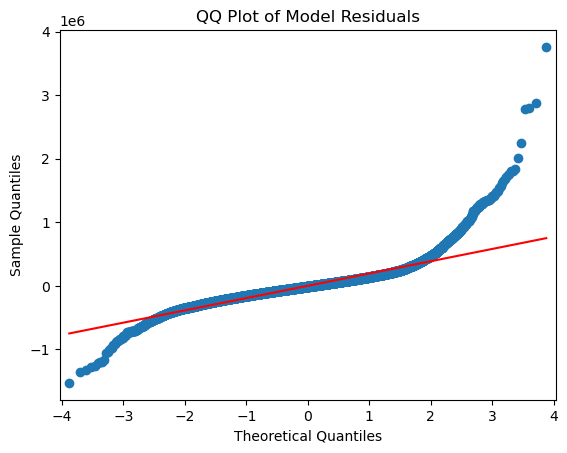

In [43]:
residuals = standardized_model.resid
sm.graphics.qqplot(residuals, line='r')
plt.title('QQ Plot of Model Residuals')
plt.show()

'waterfront_YES' and 'grade_12 Luxury' have the highest positive coefficients, indicating a significant positive influence on the predicted house price. A higher value for these variables corresponds to an increase in the predicted price.

On the other hand, 'condition_Poor' has the lowest coefficient, indicating a strong negative impact on the house price. A higher value for 'condition_Poor' leads to a decrease in the predicted price.

Understanding these influential variables is valuable for pricing decisions, assessing feature desirability, and identifying areas for improvement in housing conditions.

## Conclusion

* Houses that are situated at the waterfront and have luxurious features will have their prices increasing prices  substantial amount

* A larger living space in the home tends to be associated with higher prices.Buyers typically consider more square footage as desirable and are willing to pay a premium for it.Thus a larger living space is an essential requirement





## Recommendations

* My first recommendation to sellers would be to make living space square footage their focal point. Correlation between square footage of living space and price of the home is fairly high compared to the other features. It is clear that larger homes mandate higher asking prices. Selling homes on the larger-end of the spectrum are guaranteed to generate the most revenue.

* My second recommendation would be to pay particular attention to the locality of the home. House prices are clustered according to zipcode. Many factors and variables, tied into the zipcode, may influence the price either positively or negatively and we must be mindful of that.

* My third recommendation would be to attend to the grade given by King County to the home. It is very influential in the price of the home. In general, as the grade increases, the price increases as well. This highlights the positive linear correlation between the two.

